In [15]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
building_info = "Energy_Usage_2010.csv"

# Read Purchasing File and store into Pandas data frame
building_df = pd.read_csv(building_info)
building_df.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,170315704001006,Residential,Multi < 7,nan,nan,nan,nan,nan,nan,...,89,24,2,71,4,23,1,9,0,23
1,Ashburn,170317005014004,Residential,Multi 7+,7334,7741,4214,4284,2518,4273,...,112,67,2,41,2,62,1,50,1,62
2,Auburn Gresham,170317105001006,Commercial,Multi < 7,nan,nan,nan,nan,nan,nan,...,102,48,3,86,3,34,1,23,1,34
3,Austin,170312503003003,Commercial,Multi < 7,nan,nan,nan,nan,nan,nan,...,121,56,2,84,3,41,1,32,1,41
4,Austin,170312504002008,Commercial,Multi < 7,nan,nan,nan,nan,nan,nan,...,62,23,2,85,3,19,1,11,1,19


In [19]:
#create a dataframe for the columns used for the analysis
building_types = building_df.loc[:,["BUILDING TYPE", "BUILDING_SUBTYPE", "AVERAGE BUILDING AGE","TOTAL KWH"]]
#the data had a lot of blank information so the nex step is to drop those columns
building_type_df = building_types.dropna(how="any")
#check how many rows remain 
building_type_df.count()

BUILDING TYPE           66103
BUILDING_SUBTYPE        66103
AVERAGE BUILDING AGE    66103
TOTAL KWH               66103
dtype: int64

In [20]:
#Dataframe for KWH Usage
# the total kwh number was to large to be displayed so set the format to show the whole number
pd.set_option('display.float_format', lambda x: '%.0f' % x)
#
building_number = building_type_df.groupby("BUILDING_SUBTYPE")["BUILDING TYPE"].count()
#the total kwh usage number was to large to be displayed properly in the graph 
#so to make it more readable divide the sum by 1 million
building_usage = (building_type_df.groupby("BUILDING_SUBTYPE")["TOTAL KWH"].sum()/1000000)
building_age = building_type_df.groupby("BUILDING_SUBTYPE")["AVERAGE BUILDING AGE"].mean()
#created the datafram0
building_analysis = pd.DataFrame({"Number of Buildings by Building Type": building_number,
                                  "Average Building Age": building_age,
                                  "Total KWH Usage by Building Type": building_usage })
#show the datafram                        
building_analysis

,Number of Buildings by Building Type,Average Building Age,Total KWH Usage by Building Type
BUILDING_SUBTYPE,,,
Commercial,7491,41,5712
Industrial,26,7,235
Multi 7+,5149,75,974
Multi < 7,26920,79,1835
Municipal,253,39,439
Single Family,26264,73,2418


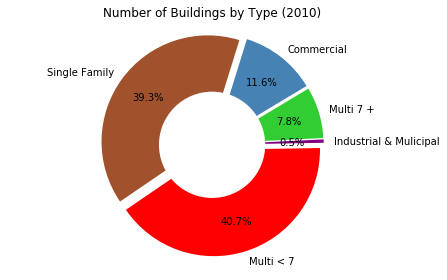

In [28]:
#BUILDING TYPE 
#Dounut chart showing the percentage of buildings by type
#types of buildings
labels = ["Industrial & Mulicipal",
          "Multi 7 +",
          "Commercial",
          "Single Family",
          "Multi < 7"]
#number of buildings
sizes = [342,5225,7775,26336, 27284]
#colors
colors = ['purple','limegreen','steelblue','sienna',"red"]

explode = (0.05,0.05,0.05,0.05,0.05)

    
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=1, explode = explode, pctdistance=0.70)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Number of Buildings by Type (2010)")
plt.tight_layout()
plt.savefig("Building Number.png")
plt.show()

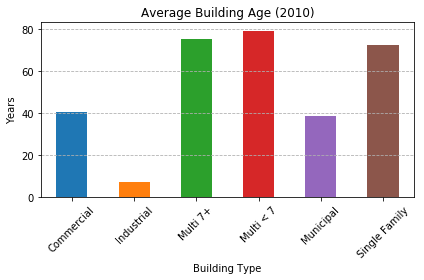

In [21]:
#AVERAGE BUILDING AGE
#Bar chart showing the average age of each type of building
age_chart = building_age.plot(kind='bar')

# Set the xlabel and ylabel using class methods
age_chart.set_title("Average Building Age (2010)")
age_chart.set_xlabel("Building Type")
age_chart.set_ylabel("Years")

plt.xticks(rotation=45)
plt.gca().yaxis.grid(True, linestyle='--')
plt.tight_layout()
plt.savefig("Average Building Age.png")

plt.show()

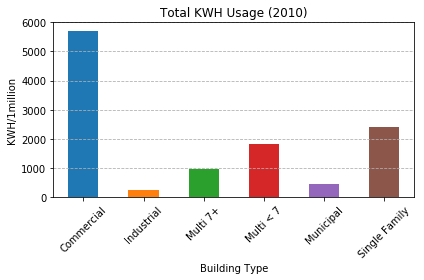

In [22]:
#TOTAL KWH USAGE
#Bar chart showing the average age of each type of building
usage_chart = building_usage.plot(kind='bar')

# Set the xlabel and ylabel using class methods
usage_chart.set_title("Total KWH Usage (2010)")
usage_chart.set_xlabel("Building Type")
usage_chart.set_ylabel("KWH/1million")

plt.xticks(rotation=45)
plt.gca().yaxis.grid(True, linestyle='--')                  
plt.tight_layout()
plt.savefig("Total Building KWH.png")


plt.show()

In [28]:
#Dataframe for KWH vs Therms
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#scale the total values by dividing by 1 million 
building_usage = (building_df.groupby("BUILDING_SUBTYPE")["TOTAL KWH"].sum()/1000000)

building_gas = (building_df.groupby("BUILDING_SUBTYPE")["TOTAL THERMS"].sum()/1000000)

building_analysis_three = pd.DataFrame({
                                  "Total THERMS Usage by Building Type": building_gas,     
                                  "Total KWH Usage by Building Type": building_usage })
                          
building_analysis_three

,Total THERMS Usage by Building Type,Total KWH Usage by Building Type
BUILDING_SUBTYPE,,
Commercial,242,5712
Industrial,1,235
Multi 7+,123,974
Multi < 7,339,1835
Municipal,20,439
Single Family,361,2418


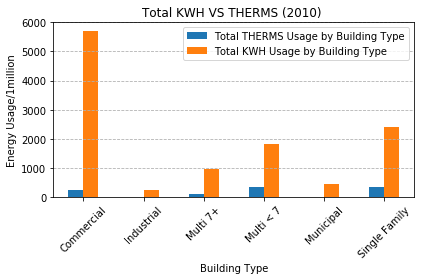

In [32]:
#TOTAL KWH VS TOTAL THERMS
#Bar chart showing the average age of each type of building
usage_chart = building_analysis_three.plot(kind='bar')

# Set the xlabel and ylabel using class methods
usage_chart.set_title("Total KWH VS THERMS (2010) ")
usage_chart.set_xlabel("Building Type")
usage_chart.set_ylabel("Energy Usage/1million")

plt.xticks(rotation=45)
plt.gca().yaxis.grid(True, linestyle='--')  
plt.tight_layout()
plt.savefig("KWH_VS_THERMS.png")

plt.show()